## Success by funding amount

In [2]:
import numpy as np
import pandas as pd

In [8]:
success_master_merged_slimmed = pd.read_csv(r'data/success_master_merged_slimmed.csv')
pd.options.display.max_columns = None
success_master_merged_slimmed.head()

,Unnamed: 0,object_id,name,category_code,status,founded_at,closed_at,acquired_at,country_code,state_code,city,region,funding_total_usd,year_founded,year_closed,month_closed,duration,year_acquired,month_acquired,t_unt_acq,term_code,price_amount,price_currency_code,id,ipo_id,valuation_amount,valuation_currency_code,raised_amount,raised_currency_code,public_at
0,0,c:1,Wetpaint,web,operating,2005-10-17,NaN,NaN,USA,WA,Seattle,Seattle,39750000.0,2005.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,c:10,Flektor,games_video,acquired,NaN,NaN,2007-05-30,USA,CA,Culver City,Los Angeles,0.0,NaN,NaN,NaN,NaN,2007.0,5.0,NaN,NaN,20000000.0,USD,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,c:100,There,games_video,acquired,NaN,NaN,2005-05-29,USA,CA,San Mateo,SF Bay,0.0,NaN,NaN,NaN,NaN,2005.0,5.0,NaN,cash,0.0,USD,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,c:10000,MYWEBBO,network_hosting,operating,2008-07-26,NaN,NaN,NaN,NaN,NaN,unknown,0.0,2008.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,c:10001,THE Movie Streamer,games_video,operating,2008-07-26,NaN,NaN,NaN,NaN,NaN,unknown,0.0,2008.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
success_master_merged_slimmed.founded_at = success_master_merged_slimmed.founded_at.astype('datetime64')
success_master_merged_slimmed.public_at = success_master_merged_slimmed.public_at.astype('datetime64')

success_master_merged_slimmed['t_unt_public'] = success_master_merged_slimmed['public_at'] - success_master_merged_slimmed['founded_at']


In [ ]:
# how many get funded by industry and country

In [18]:
funding_probability_industry = success_master_merged_slimmed[['object_id', 'country_code', 'category_code', 'funding_total_usd', 't_unt_acq', 'price_amount', 'valuation_amount' , 'raised_amount', 'public_at']]

In [20]:
funding_probability_industry['funding_total_usd'] = funding_probability_industry['funding_total_usd'].replace(0, np.nan)

/usr/local/Cellar/jupyterlab/1.2.4/libexec/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
funding_probability_industry.head()

,object_id,country_code,category_code,funding_total_usd
0,c:1,USA,web,39750000.0
1,c:10,USA,games_video,NaN
2,c:100,USA,games_video,NaN
3,c:10000,NaN,network_hosting,NaN
4,c:10001,NaN,games_video,NaN


In [ ]:
# Group by industry

In [22]:
funding_probability_industry = funding_probability_industry.groupby(['category_code']).count().reset_index()
funding_probability_industry.head()

,category_code,object_id,country_code,funding_total_usd
0,advertising,5979,4287,1081
1,analytics,1019,879,621
2,automotive,273,151,69
3,biotech,4230,3977,3036
4,cleantech,1862,1512,967


In [23]:
funding_probability_industry.rename(columns = {'object_id' : 'number', 'funding_total_usd' : 'number_funded'} , inplace = True)

In [25]:
funding_probability_industry['percent_funded'] = funding_probability_industry['number_funded'] / funding_probability_industry['number']

In [26]:
funding_probability_industry.head()

,category_code,number,country_code,number_funded,percent_funded
0,advertising,5979,4287,1081,0.180799
1,analytics,1019,879,621,0.609421
2,automotive,273,151,69,0.252747
3,biotech,4230,3977,3036,0.717730
4,cleantech,1862,1512,967,0.519334


In [27]:
funding_probability_industry.sort_values(by='percent_funded', ascending=False).reset_index().drop(columns = 'index')

,category_code,number,country_code,number_funded,percent_funded
0,nanotech,70,68,55,0.785714
1,biotech,4230,3977,3036,0.717730
2,messaging,294,251,208,0.707483
3,semiconductor,636,595,409,0.643082
4,analytics,1019,879,621,0.609421
5,medical,1129,799,651,0.576616
6,cleantech,1862,1512,967,0.519334
7,manufacturing,604,474,307,0.508278
8,nonprofit,173,146,82,0.473988
9,social,1307,796,537,0.410865


In [28]:
# funding_probability_industry.to_csv(r'data/funding_general_probability_industry.csv')

In [ ]:
# Try Correlation

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

Slope:  -6593.698635273976
Intercept:  4855.2986355256035
rvalue:  -0.3126823887315767
pvalue:  0.043786709837793286
stderr:  3167.0450601021307


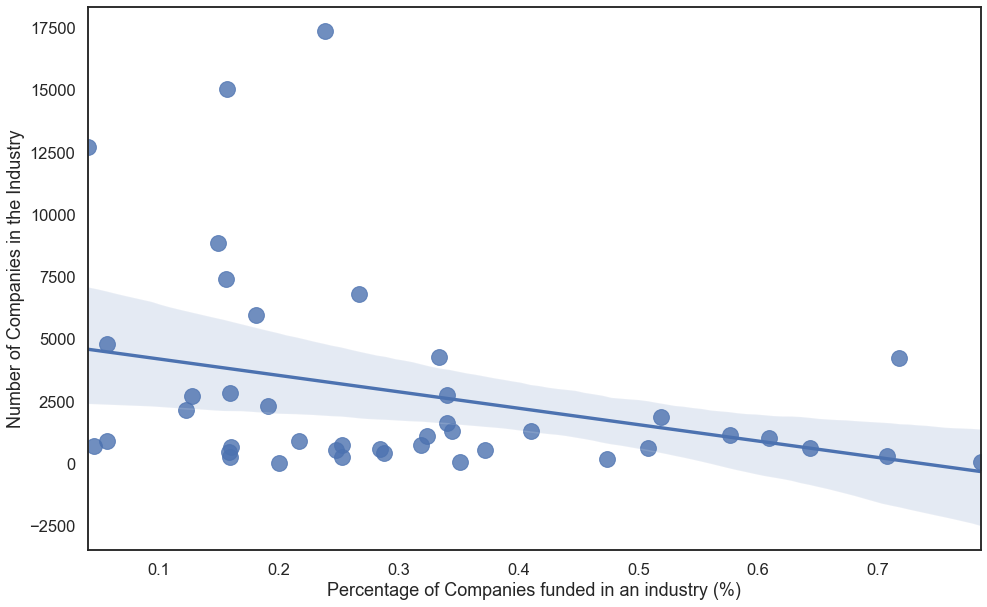

In [30]:
sns.set(style="white", context="talk")
fig, ax = plt.subplots(figsize=(16,10)) 
x = funding_probability_industry['percent_funded']
y = funding_probability_industry['number']
ax = sns.regplot(x, y, 
                  data = funding_probability_industry, scatter_kws = {"s": 250},
                  marker = "o", color = 'b')
ax.set(xlabel = "Percentage of Companies funded in an industry (%)", ylabel = "Number of Companies in the Industry")
result = stats.linregress(x, y)
print("Slope: ", result.slope)
print("Intercept: ", result.intercept)
print("rvalue: ", result.rvalue)
print("pvalue: ", result.pvalue)
print("stderr: ", result.stderr)

In [53]:
funding_probability_industry.head()

,category_code,number,country_code,number_funded,percent_funded
0,advertising,5979,4287,1081,0.180799
1,analytics,1019,879,621,0.609421
2,automotive,273,151,69,0.252747
3,biotech,4230,3977,3036,0.717730
4,cleantech,1862,1512,967,0.519334


In [54]:
# funding by geography

In [55]:
funding_probability_industry_geo = success_master_merged_slimmed[['object_id', 'country_code', 'category_code', 'funding_total_usd']]

In [56]:
funding_probability_industry_geo['funding_total_usd'] = funding_probability_industry_geo['funding_total_usd'].replace(0, np.nan)

/usr/local/Cellar/jupyterlab/1.2.4/libexec/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [57]:
funding_probability_geo = funding_probability_industry_geo.copy()
funding_probability_geo.head()

,object_id,country_code,category_code,funding_total_usd
0,c:1,USA,web,39750000.0
1,c:10,USA,games_video,NaN
2,c:100,USA,games_video,NaN
3,c:10000,NaN,network_hosting,NaN
4,c:10001,NaN,games_video,NaN


In [58]:
funding_probability_geo = funding_probability_geo.groupby(['country_code']).count().reset_index()
funding_probability_geo.head()


,country_code,object_id,category_code,funding_total_usd
0,AFG,8,8,0
1,AGO,2,2,0
2,AIA,1,0,0
3,ALB,10,10,2
4,AND,1,1,0


In [59]:
funding_probability_geo.rename(columns = {'object_id' : 'number', 'funding_total_usd' : 'number_funded'} , inplace = True)

In [60]:
funding_probability_geo['percent_funded'] = funding_probability_geo['number_funded'] / funding_probability_geo['number']

In [61]:
funding_probability_geo.sort_values(by='percent_funded', ascending=False).reset_index()

,index,country_code,number,category_code,number_funded,percent_funded
0,109,NER,1,1,1,1.0
1,142,SOM,1,1,1,1.0
2,116,NRU,1,1,1,1.0
3,84,KHM,1,1,1,1.0
4,60,GIN,1,1,1,1.0
...,...,...,...,...,...,...
167,87,LAO,2,2,0,0.0
168,1,AGO,2,2,0,0.0
169,83,KGZ,2,1,0,0.0
170,81,KAZ,3,3,0,0.0


In [42]:
# funding_probability_geo.to_csv(r'data/funding_general_probability_geo.csv')

In [ ]:
# funding by industry and geography

In [62]:
funding_probability_industry_geo.head()

,object_id,country_code,category_code,funding_total_usd
0,c:1,USA,web,39750000.0
1,c:10,USA,games_video,NaN
2,c:100,USA,games_video,NaN
3,c:10000,NaN,network_hosting,NaN
4,c:10001,NaN,games_video,NaN


In [63]:
funding_probability_industry_geo_sum = funding_probability_industry_geo.copy()

In [64]:
funding_probability_industry_geo = funding_probability_industry_geo.groupby(['category_code', 'country_code']).count().reset_index()
funding_probability_industry_geo.head()

,category_code,country_code,object_id,funding_total_usd
0,advertising,ARE,14,2
1,advertising,ARG,37,8
2,advertising,AUS,83,10
3,advertising,AUT,5,0
4,advertising,AZE,1,1


In [65]:
funding_probability_industry_geo.rename(columns = {'object_id' : 'number', 'funding_total_usd' : 'number_funded'} , inplace = True)

In [66]:
funding_probability_industry_geo.head()

,category_code,country_code,number,number_funded
0,advertising,ARE,14,2
1,advertising,ARG,37,8
2,advertising,AUS,83,10
3,advertising,AUT,5,0
4,advertising,AZE,1,1


In [67]:
funding_probability_industry_geo_sum = funding_probability_industry_geo_sum.groupby(['category_code', 'country_code']).sum().reset_index()
funding_probability_industry_geo_sum.head()

,category_code,country_code,funding_total_usd
0,advertising,ARE,3950000.0
1,advertising,ARG,7127394.0
2,advertising,AUS,16331000.0
3,advertising,AUT,0.0
4,advertising,AZE,100000.0


In [68]:
funding_probability_industry_geo_sum = pd.merge(funding_probability_industry_geo, funding_probability_industry_geo_sum)
funding_probability_industry_geo_sum.head()

,category_code,country_code,number,number_funded,funding_total_usd
0,advertising,ARE,14,2,3950000.0
1,advertising,ARG,37,8,7127394.0
2,advertising,AUS,83,10,16331000.0
3,advertising,AUT,5,0,0.0
4,advertising,AZE,1,1,100000.0


In [70]:
funding_probability_industry_geo_sum['average_funding'] = funding_probability_industry_geo_sum['funding_total_usd'] / funding_probability_industry_geo_sum['number_funded']

In [71]:
funding_probability_industry_geo_sum['percent_funded'] = funding_probability_industry_geo_sum['number_funded'] / funding_probability_industry_geo_sum['number']

In [72]:
funding_probability_industry_geo_sum.head()

,category_code,country_code,number,number_funded,funding_total_usd,average_funding,percent_funded
0,advertising,ARE,14,2,3950000.0,1975000.00,0.142857
1,advertising,ARG,37,8,7127394.0,890924.25,0.216216
2,advertising,AUS,83,10,16331000.0,1633100.00,0.120482
3,advertising,AUT,5,0,0.0,NaN,0.000000
4,advertising,AZE,1,1,100000.0,100000.00,1.000000


In [73]:
# funding_probability_industry_geo_sum.to_csv(r'data/funding_probability_industry_geo_sum.csv')

### First: funding rounds in itself - assuming you get funding

In [74]:
funding_rounds = pd.read_csv(r'data/initial/funding_rounds.csv')
funding_rounds.head()

,id,funding_round_id,object_id,funded_at,funding_round_type,funding_round_code,raised_amount_usd,raised_amount,raised_currency_code,pre_money_valuation_usd,pre_money_valuation,pre_money_currency_code,post_money_valuation_usd,post_money_valuation,post_money_currency_code,participants,is_first_round,is_last_round,source_url,source_description,created_by,created_at,updated_at
0,1,1,c:4,2006-12-01,series-b,b,8500000.0,8500000.0,USD,0.0,0.0,NaN,0.0,0.0,NaN,2,0,0,http://www.marketingvox.com/archives/2006/12/2...,NaN,initial-importer,2007-07-04 04:52:57,2008-02-27 23:14:29
1,2,2,c:5,2004-09-01,angel,angel,500000.0,500000.0,USD,0.0,0.0,USD,0.0,0.0,USD,2,0,1,NaN,NaN,initial-importer,2007-05-27 06:08:18,2013-06-28 20:07:23
2,3,3,c:5,2005-05-01,series-a,a,12700000.0,12700000.0,USD,115000000.0,115000000.0,USD,0.0,0.0,USD,3,0,0,http://www.techcrunch.com/2007/11/02/jim-breye...,Jim Breyer: Extra $500 Million Round For Faceb...,initial-importer,2007-05-27 06:09:10,2013-06-28 20:07:23
3,4,4,c:5,2006-04-01,series-b,b,27500000.0,27500000.0,USD,525000000.0,525000000.0,USD,0.0,0.0,USD,4,0,0,http://www.facebook.com/press/info.php?factsheet,Facebook Funding,initial-importer,2007-05-27 06:09:36,2013-06-28 20:07:24
4,5,5,c:7299,2006-05-01,series-b,b,10500000.0,10500000.0,USD,0.0,0.0,NaN,0.0,0.0,NaN,2,0,0,http://www.techcrunch.com/2006/05/14/photobuck...,PhotoBucket Closes $10.5M From Trinity Ventures,initial-importer,2007-05-29 11:05:59,2008-04-16 17:09:12


In [75]:
industry_country = success_master_merged_slimmed[['object_id', 'category_code', 'country_code', 'funding_total_usd']]
industry_country.head()

,object_id,category_code,country_code,funding_total_usd
0,c:1,web,USA,39750000.0
1,c:10,games_video,USA,0.0
2,c:100,games_video,USA,0.0
3,c:10000,network_hosting,NaN,0.0
4,c:10001,games_video,NaN,0.0


In [76]:
funding_rounds_slimmed = funding_rounds[['object_id', 'funding_round_id', 'funding_round_type', 'funding_round_code', 'raised_amount_usd', 'pre_money_valuation_usd']]
funding_rounds_slimmed.head()

,object_id,funding_round_id,funding_round_type,funding_round_code,raised_amount_usd,pre_money_valuation_usd
0,c:4,1,series-b,b,8500000.0,0.0
1,c:5,2,angel,angel,500000.0,0.0
2,c:5,3,series-a,a,12700000.0,115000000.0
3,c:5,4,series-b,b,27500000.0,525000000.0
4,c:7299,5,series-b,b,10500000.0,0.0


In [77]:
funding_rounds_merged = pd.merge(funding_rounds_slimmed, industry_country, on = 'object_id', how='outer')
funding_rounds_merged.head()

,object_id,funding_round_id,funding_round_type,funding_round_code,raised_amount_usd,pre_money_valuation_usd,category_code,country_code,funding_total_usd
0,c:4,1.0,series-b,b,8500000.0,0.0,news,USA,4.500000e+07
1,c:4,85.0,series-a,a,2800000.0,0.0,news,USA,4.500000e+07
2,c:4,3503.0,series-c+,c,28700000.0,0.0,news,USA,4.500000e+07
3,c:4,24136.0,series-c+,d,5000000.0,0.0,news,USA,4.500000e+07
4,c:5,2.0,angel,angel,500000.0,0.0,social,USA,2.425700e+09


In [ ]:
# total funding by industry nochmal

In [ ]:
# total funding by country nochmal

In [ ]:
# merge 

## Second: Aquisitions following funding

In [ ]:
# see funding at all

In [87]:
acquisition_ipo_probability = success_master_merged_slimmed[['object_id', 'country_code', 'category_code', 'funding_total_usd', 't_unt_acq', 'price_amount', 'valuation_amount' , 'raised_amount', 't_unt_public']]
acquisition_ipo_probability['funding_total_usd'] = acquisition_ipo_probability['funding_total_usd'].replace(0, np.nan)
acquisition_ipo_probability.head()

/usr/local/Cellar/jupyterlab/1.2.4/libexec/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,object_id,country_code,category_code,funding_total_usd,t_unt_acq,price_amount,valuation_amount,raised_amount,t_unt_public
0,c:1,USA,web,39750000.0,NaN,NaN,NaN,NaN,NaT
1,c:10,USA,games_video,NaN,NaN,20000000.0,NaN,NaN,NaT
2,c:100,USA,games_video,NaN,NaN,0.0,NaN,NaN,NaT
3,c:10000,NaN,network_hosting,NaN,NaN,NaN,NaN,NaN,NaT
4,c:10001,NaN,games_video,NaN,NaN,NaN,NaN,NaN,NaT


In [96]:
acquisition_probability_industry = acquisition_ipo_probability.groupby(['category_code']).count().reset_index()
acquisition_probability_industry.head()

,category_code,object_id,country_code,funding_total_usd,t_unt_acq,price_amount,valuation_amount,raised_amount,t_unt_public
0,advertising,5979,4287,1081,234,312,26,26,16
1,analytics,1019,879,621,36,40,3,3,0
2,automotive,273,151,69,3,5,3,3,1
3,biotech,4230,3977,3036,207,412,237,237,56
4,cleantech,1862,1512,967,56,107,46,46,11


In [97]:
acquisition_probability_industry['percent_funded'] = acquisition_probability_industry['funding_total_usd'] / acquisition_probability_industry['object_id'] 
acquisition_probability_industry['percent_acquired'] = acquisition_probability_industry['price_amount'] / acquisition_probability_industry['object_id'] 
acquisition_probability_industry['percent_public'] = acquisition_probability_industry['valuation_amount'] / acquisition_probability_industry['object_id'] 

In [98]:
acquisition_probability_industry.head()

,category_code,object_id,country_code,funding_total_usd,t_unt_acq,price_amount,valuation_amount,raised_amount,t_unt_public,percent_funded,percent_acquired,percent_public
0,advertising,5979,4287,1081,234,312,26,26,16,0.180799,0.052183,0.004349
1,analytics,1019,879,621,36,40,3,3,0,0.609421,0.039254,0.002944
2,automotive,273,151,69,3,5,3,3,1,0.252747,0.018315,0.010989
3,biotech,4230,3977,3036,207,412,237,237,56,0.717730,0.097400,0.056028
4,cleantech,1862,1512,967,56,107,46,46,11,0.519334,0.057465,0.024705


In [100]:
acquisition_probability_industry_slimmed = acquisition_probability_industry[['category_code', 'object_id', 'percent_funded', 'percent_acquired', 'percent_public']]
acquisition_probability_industry_slimmed.rename(columns = {'object_id' : 'number'}, inplace = True)
acquisition_probability_industry_slimmed.head()

/usr/local/Cellar/jupyterlab/1.2.4/libexec/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,category_code,number,percent_funded,percent_acquired,percent_public
0,advertising,5979,0.180799,0.052183,0.004349
1,analytics,1019,0.609421,0.039254,0.002944
2,automotive,273,0.252747,0.018315,0.010989
3,biotech,4230,0.717730,0.097400,0.056028
4,cleantech,1862,0.519334,0.057465,0.024705


In [101]:
# acquisition_probability_industry_slimmed.to_csv(r'data/fund_acq_ipo_prob_ind.csv')

In [ ]:
# correlation amount funding and being acquired

In [ ]:
# filter by acquisition

In [102]:
success_master_merged_slimmed.head()

,Unnamed: 0,object_id,name,category_code,status,founded_at,closed_at,acquired_at,country_code,state_code,city,region,funding_total_usd,year_founded,year_closed,month_closed,duration,year_acquired,month_acquired,t_unt_acq,term_code,price_amount,price_currency_code,id,ipo_id,valuation_amount,valuation_currency_code,raised_amount,raised_currency_code,public_at,t_unt_public
0,0,c:1,Wetpaint,web,operating,2005-10-17,NaN,NaN,USA,WA,Seattle,Seattle,39750000.0,2005.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
1,1,c:10,Flektor,games_video,acquired,NaT,NaN,2007-05-30,USA,CA,Culver City,Los Angeles,0.0,NaN,NaN,NaN,NaN,2007.0,5.0,NaN,NaN,20000000.0,USD,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
2,2,c:100,There,games_video,acquired,NaT,NaN,2005-05-29,USA,CA,San Mateo,SF Bay,0.0,NaN,NaN,NaN,NaN,2005.0,5.0,NaN,cash,0.0,USD,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
3,3,c:10000,MYWEBBO,network_hosting,operating,2008-07-26,NaN,NaN,NaN,NaN,NaN,unknown,0.0,2008.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
4,4,c:10001,THE Movie Streamer,games_video,operating,2008-07-26,NaN,NaN,NaN,NaN,NaN,unknown,0.0,2008.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT


In [104]:
acquired_fund_rel = success_master_merged_slimmed.copy()
idx = acquired_fund_rel[acquired_fund_rel['status'] != 'acquired'].index
acquired_fund_rel.drop(idx , inplace=True)
print(len(success_master_merged_slimmed))
print(len(acquired_fund_rel))
acquired_fund_rel.head()

192719
9060


,Unnamed: 0,object_id,name,category_code,status,founded_at,closed_at,acquired_at,country_code,state_code,city,region,funding_total_usd,year_founded,year_closed,month_closed,duration,year_acquired,month_acquired,t_unt_acq,term_code,price_amount,price_currency_code,id,ipo_id,valuation_amount,valuation_currency_code,raised_amount,raised_currency_code,public_at,t_unt_public
1,1,c:10,Flektor,games_video,acquired,NaT,NaN,2007-05-30,USA,CA,Culver City,Los Angeles,0.0,NaN,NaN,NaN,NaN,2007.0,5.0,NaN,NaN,20000000.0,USD,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
2,2,c:100,There,games_video,acquired,NaT,NaN,2005-05-29,USA,CA,San Mateo,SF Bay,0.0,NaN,NaN,NaN,NaN,2005.0,5.0,NaN,cash,0.0,USD,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
13,13,c:1001,FriendFeed,web,acquired,2007-10-01,NaN,2009-08-10,USA,CA,Mountain View,SF Bay,5000000.0,2007.0,NaN,NaN,NaN,2009.0,8.0,679 days 00:00:00.000000000,cash_and_stock,47500000.0,USD,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
18,18,c:10014,Mobclix,mobile,acquired,2008-03-01,NaN,2010-09-30,USA,CA,Palo Alto,SF Bay,0.0,2008.0,NaN,NaN,NaN,2010.0,9.0,943 days 00:00:00.000000000,NaN,0.0,USD,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
42,42,c:100265,Coastal Supply Company,NaN,acquired,NaT,NaN,2011-09-06,NaN,NaN,NaN,unknown,0.0,NaN,NaN,NaN,NaN,2011.0,9.0,NaN,NaN,0.0,USD,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT


In [111]:
acquired_fund_rel_slimmed = acquired_fund_rel[['object_id', 'category_code', 'country_code', 'funding_total_usd', 'founded_at', 'acquired_at', 'price_amount']]

In [112]:
acquired_fund_rel_slimmed['funding_total_usd'] = acquired_fund_rel_slimmed['funding_total_usd'].replace(0, np.nan)

/usr/local/Cellar/jupyterlab/1.2.4/libexec/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [116]:
acquired_fund_rel_slimmed.head()

,object_id,category_code,country_code,funding_total_usd,founded_at,acquired_at,price_amount
1,c:10,games_video,USA,NaN,NaT,2007-05-30,20000000.0
2,c:100,games_video,USA,NaN,NaT,2005-05-29,0.0
13,c:1001,web,USA,5000000.0,2007-10-01,2009-08-10,47500000.0
18,c:10014,mobile,USA,NaN,2008-03-01,2010-09-30,0.0
42,c:100265,NaN,NaN,NaN,NaT,2011-09-06,0.0


In [129]:
#grouped by industry
acq_fund_rel_ind = acquired_fund_rel_slimmed.groupby(['category_code']).count().reset_index()

In [130]:
acq_fund_rel_ind.rename(columns = {'object_id' : 'number_byind', 'funding_total_usd' : 'number_funded', 'price_amount':'number_acq'} , inplace = True)

In [131]:
acq_fund_rel_ind = acq_fund_rel_ind[['category_code', 'number_byind', 'number_funded', 'number_acq']]
acq_fund_rel_ind.head()

,category_code,number_byind,number_funded,number_acq
0,advertising,312,118,312
1,analytics,40,35,40
2,automotive,5,3,5
3,biotech,412,158,412
4,cleantech,107,55,107


In [118]:
# sum
acq_fund_rel_ind_sum = acquired_fund_rel_slimmed.groupby(['category_code']).sum().reset_index()
acq_fund_rel_ind_sum.head()

,category_code,funding_total_usd,price_amount
0,advertising,1.849381e+09,2.147999e+10
1,analytics,3.924261e+08,5.430000e+08
2,automotive,4.603000e+07,7.643000e+09
3,biotech,6.124936e+09,1.391689e+11
4,cleantech,4.273230e+09,1.461245e+10


In [156]:
acquisition_probability_industry_slimmed.head()

,category_code,number,percent_funded,percent_acquired,percent_public
0,advertising,5979,0.180799,0.052183,0.004349
1,analytics,1019,0.609421,0.039254,0.002944
2,automotive,273,0.252747,0.018315,0.010989
3,biotech,4230,0.717730,0.097400,0.056028
4,cleantech,1862,0.519334,0.057465,0.024705


In [157]:
acq_fund_ind = pd.merge(acq_fund_rel_ind, acq_fund_rel_ind_sum, on = 'category_code')

In [158]:
acq_fund_ind['number'] = acquisition_probability_industry_slimmed['number']
acq_fund_ind['percent_funded_total'] = acquisition_probability_industry_slimmed['percent_funded']
acq_fund_ind['percent_acquired_total'] = acquisition_probability_industry_slimmed['percent_acquired']

acq_fund_ind['percent_public'] = acquisition_probability_industry_slimmed['percent_public']

In [165]:
acq_fund_ind['percent_funded&acq'] = acq_fund_ind['number_funded'] / acq_fund_ind['number'] 
acq_fund_ind['percent_acquired'] = acq_fund_ind['number_acq'] / acq_fund_ind['number'] 
acq_fund_ind['percent_acq_fund'] = acq_fund_ind['number_funded'] / acq_fund_ind['number_acq'] 
acq_fund_ind['avg_funding_acq'] = acq_fund_ind['funding_total_usd'] / acq_fund_ind['number_funded']
acq_fund_ind['avg_price_acq'] = acq_fund_ind['price_amount'] / acq_fund_ind['number_acq']
acq_fund_ind['nr_total_funded'] = acquisition_probability_industry_slimmed['number'] * acquisition_probability_industry_slimmed['percent_funded']
acq_fund_ind['percent_of_fund_acq'] = acq_fund_ind['number_acq'] / acq_fund_ind['nr_total_funded']
acq_fund_ind['increase_prob_acq_fund'] = acq_fund_ind['percent_of_fund_acq'] - acq_fund_ind['percent_acq_fund']

In [167]:
acq_fund_ind.head()

,category_code,number_byind,number_funded,number_acq,funding_total_usd,price_amount,number,percent_funded_total,percent_acquired_total,percent_public,percent_funded&acq,percent_acquired,percent_acq_fund,avg_funding_acq,avg_price_acq,nr_total_funded,percent_of_fund_acq,increase_prob_acq_fund
0,advertising,312,118,312,1.849381e+09,2.147999e+10,5979,0.180799,0.052183,0.004349,0.019736,0.052183,0.378205,1.567272e+07,6.884612e+07,1081.0,0.288622,0.089583
1,analytics,40,35,40,3.924261e+08,5.430000e+08,1019,0.609421,0.039254,0.002944,0.034347,0.039254,0.875000,1.121218e+07,1.357500e+07,621.0,0.064412,0.810588
2,automotive,5,3,5,4.603000e+07,7.643000e+09,273,0.252747,0.018315,0.010989,0.010989,0.018315,0.600000,1.534333e+07,1.528600e+09,69.0,0.072464,0.527536
3,biotech,412,158,412,6.124936e+09,1.391689e+11,4230,0.717730,0.097400,0.056028,0.037352,0.097400,0.383495,3.876542e+07,3.377885e+08,3036.0,0.135705,0.247790
4,cleantech,107,55,107,4.273230e+09,1.461245e+10,1862,0.519334,0.057465,0.024705,0.029538,0.057465,0.514019,7.769510e+07,1.365650e+08,967.0,0.110651,0.403367


In [174]:
acq_fund_ind.to_csv(r'data/funding_acquisition_prob.csv')

Slope:  554174783.0721252
Intercept:  991433602.7657511
rvalue:  0.295620385276551
pvalue:  0.06402363322474158
stderr:  290511185.48998517


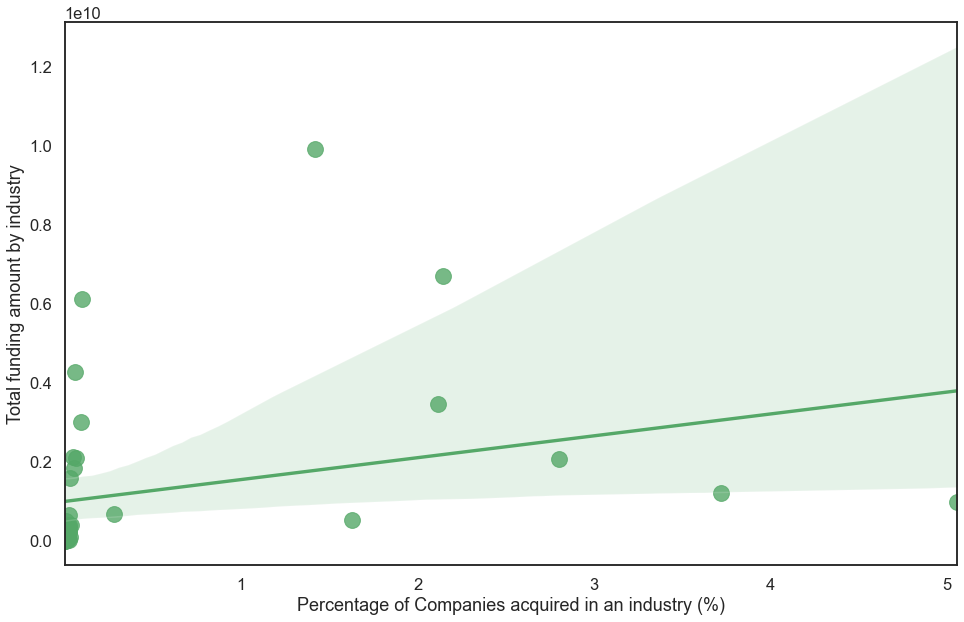

In [151]:
sns.set(style="white", context="talk")
fig, ax = plt.subplots(figsize=(16,10)) 
x = acq_fund_ind['percent_acquired']
y = acq_fund_ind['funding_total_usd']
ax = sns.regplot(x, y, 
                  data = acq_fund_ind, scatter_kws = {"s": 250},
                  marker = "o", color = 'g')
ax.set(xlabel = "Percentage of Companies acquired in an industry (%)", ylabel = "Total funding amount by industry")
result = stats.linregress(x, y)
print("Slope: ", result.slope)
print("Intercept: ", result.intercept)
print("rvalue: ", result.rvalue)
print("pvalue: ", result.pvalue)
print("stderr: ", result.stderr)

In [119]:
# grouped by country
acq_fund_rel_geo = acquired_fund_rel_slimmed.groupby(['country_code']).count().reset_index()
acq_fund_rel_geo.head()

,country_code,object_id,category_code,funding_total_usd,founded_at,acquired_at,price_amount
0,AIA,1,0,0,0,1,1
1,ANT,1,1,0,1,1,1
2,ARE,2,2,0,1,2,2
3,ARG,12,11,4,9,12,12
4,AUS,78,54,5,29,78,78


In [120]:
acq_fund_rel_geo_sum = acquired_fund_rel_slimmed.groupby(['country_code']).sum().reset_index()
acq_fund_rel_geo_sum.head()

,country_code,funding_total_usd,price_amount
0,AIA,0.0,0.000000e+00
1,ANT,0.0,6.006000e+07
2,ARE,0.0,6.000000e+05
3,ARG,26240000.0,5.900000e+07
4,AUS,15150000.0,1.844808e+09


In [ ]:
# grouped by both
funding_probability_industry = funding_probability_industry.groupby(['category_code']).count().reset_index()
funding_probability_industry.head()

In [ ]:
# filter by IPO

In [175]:
success_master_merged_slimmed.head()

,Unnamed: 0,object_id,name,category_code,status,founded_at,closed_at,acquired_at,country_code,state_code,city,region,funding_total_usd,year_founded,year_closed,month_closed,duration,year_acquired,month_acquired,t_unt_acq,term_code,price_amount,price_currency_code,id,ipo_id,valuation_amount,valuation_currency_code,raised_amount,raised_currency_code,public_at,t_unt_public
0,0,c:1,Wetpaint,web,operating,2005-10-17,NaN,NaN,USA,WA,Seattle,Seattle,39750000.0,2005.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
1,1,c:10,Flektor,games_video,acquired,NaT,NaN,2007-05-30,USA,CA,Culver City,Los Angeles,0.0,NaN,NaN,NaN,NaN,2007.0,5.0,NaN,NaN,20000000.0,USD,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
2,2,c:100,There,games_video,acquired,NaT,NaN,2005-05-29,USA,CA,San Mateo,SF Bay,0.0,NaN,NaN,NaN,NaN,2005.0,5.0,NaN,cash,0.0,USD,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
3,3,c:10000,MYWEBBO,network_hosting,operating,2008-07-26,NaN,NaN,NaN,NaN,NaN,unknown,0.0,2008.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
4,4,c:10001,THE Movie Streamer,games_video,operating,2008-07-26,NaN,NaN,NaN,NaN,NaN,unknown,0.0,2008.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT


In [177]:
success_master_merged_slimmed.status.unique()

array(['operating', 'acquired', 'closed', 'ipo', nan], dtype=object)

In [ ]:
ipo_probability_ind = success_master_merged_slimmed.copy()
idx = ipo_probability_ind['status']

idx = comps_closed_ann[comps_closed_ann['year_closed'] < 1998].index
comps_closed_ann.drop(idx , inplace=True)
comps_closed_ann.year_closed.min()

In [183]:
ipo_probability_ind = success_master_merged_slimmed.copy()
ipo_probability_ind = ipo_probability_ind[['status', 'object_id', 'category_code', 'country_code', 'funding_total_usd', 'ipo_id', 'valuation_amount', 'raised_amount', 't_unt_public']]

In [185]:
ipo_probability_industry = ipo_probability_ind.groupby(['category_code', 'status']).agg({'object_id' : 'count', 'funding_total_usd': 'sum', 'valuation_amount': 'sum', 'raised_amount':'sum'})
ipo_probability_industry.reset_index()

,category_code,status,object_id,funding_total_usd,valuation_amount,raised_amount
0,advertising,acquired,312,1.849381e+09,0.000000e+00,0.0
1,advertising,closed,95,2.386023e+08,0.000000e+00,0.0
2,advertising,ipo,23,1.120431e+09,1.673322e+09,611000000.0
3,advertising,operating,5549,9.107126e+09,0.000000e+00,0.0
4,analytics,acquired,40,3.924261e+08,0.000000e+00,0.0
...,...,...,...,...,...,...
152,travel,operating,871,1.845505e+09,0.000000e+00,0.0
153,web,acquired,988,3.470549e+09,7.341540e+09,417000000.0
154,web,closed,611,8.806721e+08,0.000000e+00,0.0
155,web,ipo,39,2.264049e+09,2.568000e+10,127000000.0


In [ ]:
ipo_probability_industry['perc_fund_ipo'] = ipo_probability_industry['perc_fund_ipo']
ipo_probability_industry['ave_fund_status']
ipo_probability_industry['average_ipo_raised']
ipo_probability_industry['average_ipo_valuation']